In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from helper_functions.OULAD_Helper import plotPerColumnDistribution
from helper_functions.OULAD_Helper import show_basic_info
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np
import pandas as pd
from ggplot import *

In [11]:
dir_ = 'OULAD' #Tên folder
directory = os.listdir(dir_)
print(directory)

['assessments.csv', 'courses.csv', 'OULAD.names', 'studentAssessment.csv', 'studentInfo.csv', 'studentRegistration.csv', 'studentVle.csv', 'vle.csv']


In [12]:
assessments_df = pd.read_csv('OULAD/assessments.csv')
# show_basic_info(assessments_df)

courses_df = pd.read_csv('OULAD/courses.csv')
# show_basic_info(courses_df)

studentAssessment_df = pd.read_csv('OULAD/studentAssessment.csv')
# show_basic_info(studentAssessment_df)

studentInfo_df = pd.read_csv('OULAD/studentInfo.csv')
# show_basic_info(studentInfo_df)

studentRegistration_df = pd.read_csv('OULAD/studentRegistration.csv')
# show_basic_info(studentRegistration_df)

studentVle_df = pd.read_csv('OULAD/studentVle.csv')
# show_basic_info(studentVle_df)

vle_df = pd.read_csv('OULAD/vle.csv')
# show_basic_info(vle_df)

In [13]:
# Code module and code presentation are always used together to identify a module. 
# Therefore, these 2 column will be merged to create a feature which uniquely identifies a module.

courses_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), courses_df.code_module, courses_df.code_presentation))
assessments_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), assessments_df.code_module, assessments_df.code_presentation))
vle_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), vle_df.code_module, vle_df.code_presentation))
studentInfo_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), studentInfo_df.code_module, studentInfo_df.code_presentation))
studentRegistration_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), studentRegistration_df.code_module, studentRegistration_df.code_presentation))
studentVle_df["module_presentation"] = list(map(lambda x,y: str(x) + "_" + str(y), studentVle_df.code_module, studentVle_df.code_presentation))


print(" In Student Info table; \n # of rows: {} \n # of unique student Ids: {} \n \
Hence, There are different records for same students' different modul enrolments." .format(len(studentInfo_df),len(studentInfo_df.id_student.unique())))
print("\n This also means that student ID is not really a unique identifier of the table.\n")

 In Student Info table; 
 # of rows: 32593 
 # of unique student Ids: 28785 
 Hence, There are different records for same students' different modul enrolments.

 This also means that student ID is not really a unique identifier of the table.



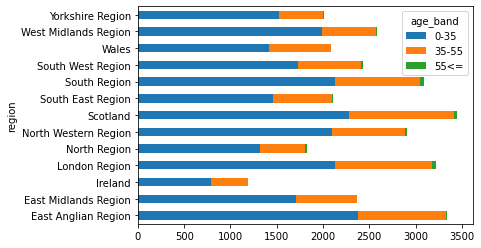

In [14]:
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True);

In [15]:
# selecting a subset of cols which are of importance to us and grouping them by student id and aggregating them using median
studentPerformance_df = studentInfo_df[['id_student', 'num_of_prev_attempts', 'studied_credits']].groupby('id_student').median()

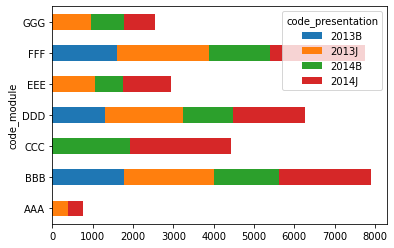

In [16]:
pd.crosstab(studentInfo_df.code_module, studentInfo_df.code_presentation).plot.barh(stacked = True);

In [17]:
studentModuleLengths_df = studentInfo_df.merge(courses_df, on = ['code_module', 'code_presentation'], how='left')
studentModuleLengths_df = studentModuleLengths_df[['id_student', 'module_presentation_length']].groupby('id_student').median()
studentModuleLengths_df = studentModuleLengths_df.reset_index()

c:\hello\ai\ai_evr\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '234.0'),
 Text(1, 0, '237.0'),
 Text(2, 0, '237.5'),
 Text(3, 0, '240.0'),
 Text(4, 0, '240.5'),
 Text(5, 0, '241.0'),
 Text(6, 0, '247.5'),
 Text(7, 0, '248.0'),
 Text(8, 0, '250.5'),
 Text(9, 0, '251.0'),
 Text(10, 0, '251.5'),
 Text(11, 0, '254.0'),
 Text(12, 0, '254.5'),
 Text(13, 0, '255.0'),
 Text(14, 0, '261.0'),
 Text(15, 0, '261.5'),
 Text(16, 0, '262.0'),
 Text(17, 0, '264.5'),
 Text(18, 0, '265.0'),
 Text(19, 0, '265.5'),
 Text(20, 0, '268.0'),
 Text(21, 0, '268.5'),
 Text(22, 0, '269.0')]

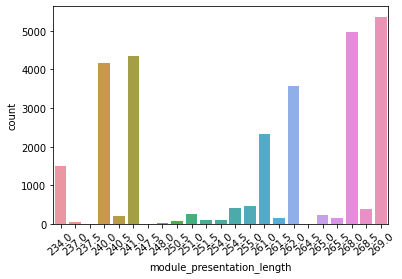

In [18]:
g = sns.countplot(studentModuleLengths_df.module_presentation_length)
g.set_xticklabels(g.get_xticklabels(), rotation=40)

<AxesSubplot:>

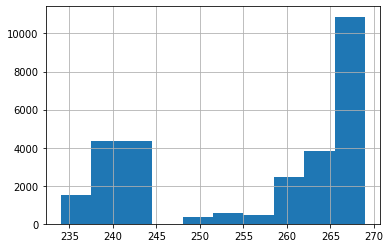

In [19]:
studentModuleLengths_df.module_presentation_length.hist()

In [20]:
studentRegistration_df['unregistered'] = np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 1)
studentRegistration_df['registered'] = np.where(pd.isnull(studentRegistration_df.date_registration), 0, 1)
# studentRegistration_df['unregistered'] = np.where((studentRegistration_df.date_unregistration==0), 0, 1)
# studentRegistration_df['registered'] = np.where((studentRegistration_df.date_registration==0), 0, 1)


In [21]:
studentRegistration_df['date_unregistration'] = np.where((studentRegistration_df.date_unregistration=='?'), 0,studentRegistration_df.date_unregistration)
studentRegistration_df['date_registration'] = np.where((studentRegistration_df.date_registration=='?'), 0,studentRegistration_df.date_registration)

In [22]:
studentRegistration_df['register_days'] = (np.where(pd.isnull(studentRegistration_df.date_registration), 0, 
                                          studentRegistration_df.date_registration)).astype(int)
studentRegistration_df['unregister_days'] = (np.where(pd.isnull(studentRegistration_df.date_unregistration), 0, 
                                            studentRegistration_df.date_unregistration)).astype(int)
studentRegDays_df = studentRegistration_df[['id_student', 'register_days', 
                                   'unregister_days']].groupby(['id_student']).mean()
studentRegDays_df = studentRegDays_df.reset_index()
studentRegDays_df.head()

,id_student,register_days,unregister_days
0,3733,-68.0,-8.0
1,6516,-52.0,0.0
2,8462,-87.5,68.5
3,11391,-159.0,0.0
4,23629,-47.0,0.0


In [23]:
studentInterest_df = studentRegistration_df[['id_student', 'registered', 'unregistered']].groupby(['id_student']).sum()
studentInterest_df = studentInterest_df.reset_index()

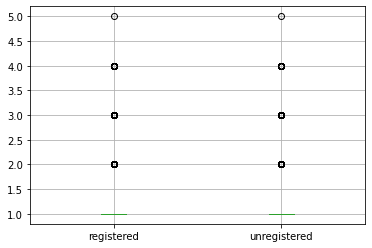

In [24]:
studentInterest_df[['registered', 'unregistered']].boxplot();

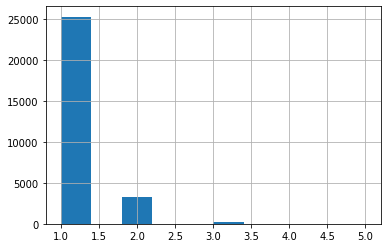

In [25]:
studentInterest_df.unregistered.hist();

In [26]:
studentAssessment_df['score'] = (np.where((studentAssessment_df.score=='?'), 0, studentAssessment_df.score)).astype(int)

In [27]:
studentAssessment_df['score'] = (np.where(pd.isnull(studentAssessment_df.score), 0, studentAssessment_df.score)).astype(int)

In [28]:
studentAssessment_df['assessment_mean'] = studentAssessment_df['score'].groupby(studentAssessment_df['id_assessment']) \
.transform('mean')

In [29]:
studentAssessment_df['score_std'] = studentAssessment_df.score/studentAssessment_df.assessment_mean

In [30]:
studentScoring_df = studentAssessment_df[['id_student', 
                                          'score_std']].groupby(['id_student']).median()
studentScoring_df = studentScoring_df.reset_index()
studentScoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23369 entries, 0 to 23368
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_student  23369 non-null  int64  
 1   score_std   23369 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 365.3 KB


In [31]:
studentVle_df = studentVle_df.merge(vle_df, on = 'id_site', how = 'left')

c:\hello\ai\ai_evr\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'forumng'),
  Text(1, 0, 'homepage'),
  Text(2, 0, 'oucontent'),
  Text(3, 0, 'subpage'),
  Text(4, 0, 'url'),
  Text(5, 0, 'resource'),
  Text(6, 0, 'glossary'),
  Text(7, 0, 'dataplus'),
  Text(8, 0, 'oucollaborate'),
  Text(9, 0, 'quiz'),
  Text(10, 0, 'ouelluminate'),
  Text(11, 0, 'sharedsubpage'),
  Text(12, 0, 'questionnaire'),
  Text(13, 0, 'page'),
  Text(14, 0, 'externalquiz'),
  Text(15, 0, 'ouwiki'),
  Text(16, 0, 'dualpane'),
  Text(17, 0, 'repeatactivity'),
  Text(18, 0, 'folder'),
  Text(19, 0, 'htmlactivity')])

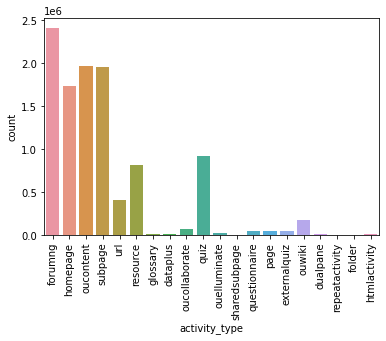

In [32]:
sns.countplot(studentVle_df.activity_type)
plt.xticks(rotation = 90)

In [33]:
studentInteractivity_df = studentVle_df[['id_student', 
                                     'activity_type', 'sum_click']].groupby(['id_student', 'activity_type']).mean()
studentInteractivity_df = studentInteractivity_df.reset_index()
studentInteractivity_df.head()

,id_student,activity_type,sum_click
0,6516,dataplus,5.250000
1,6516,forumng,2.577143
2,6516,homepage,3.145570
3,6516,oucontent,8.179348
4,6516,resource,1.631579


In [34]:
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_student      26074 non-null  int64  
 1   dataplus        26074 non-null  float64
 2   dualpane        26074 non-null  float64
 3   externalquiz    26074 non-null  float64
 4   folder          26074 non-null  float64
 5   forumng         26074 non-null  float64
 6   glossary        26074 non-null  float64
 7   homepage        26074 non-null  float64
 8   htmlactivity    26074 non-null  float64
 9   oucollaborate   26074 non-null  float64
 10  oucontent       26074 non-null  float64
 11  ouelluminate    26074 non-null  float64
 12  ouwiki          26074 non-null  float64
 13  page            26074 non-null  float64
 14  questionnaire   26074 non-null  float64
 15  quiz            26074 non-null  float64
 16  repeatactivity  26074 non-null  float64
 17  resource        26074 non-null 

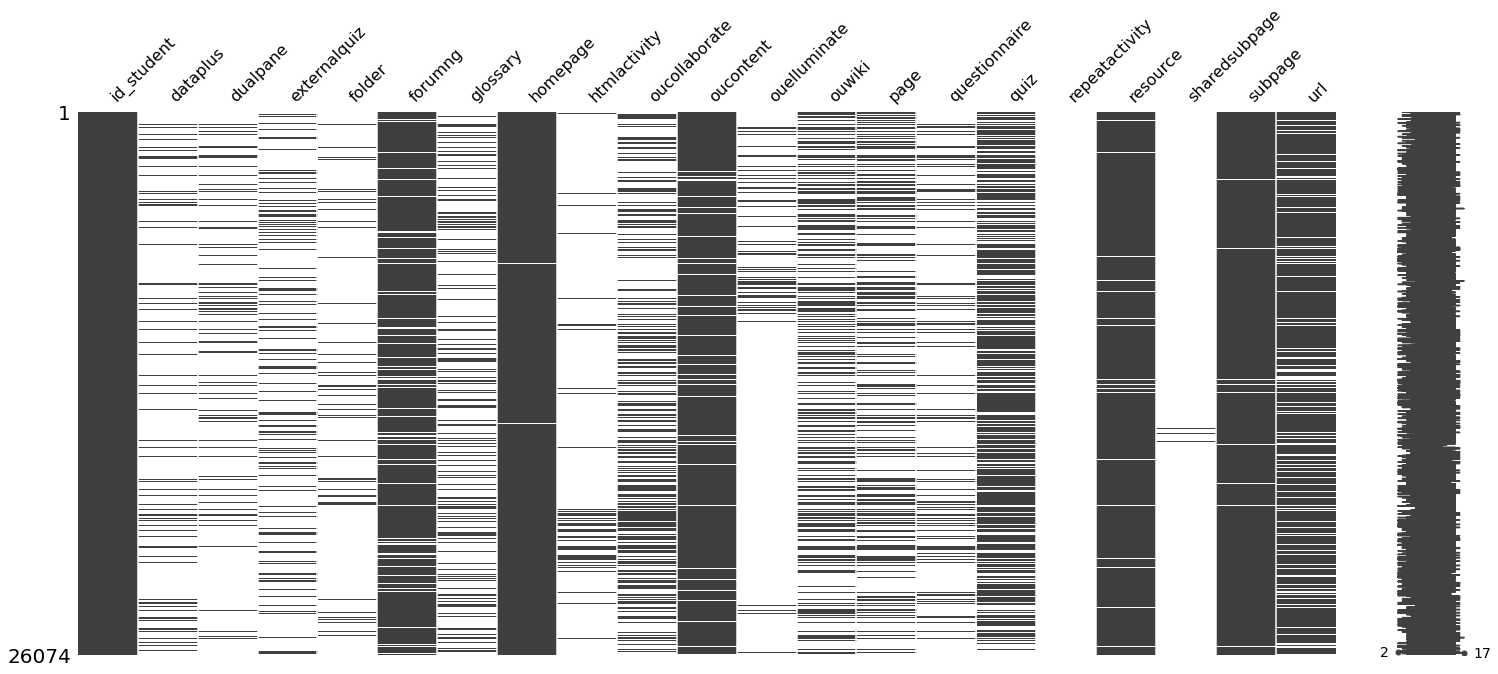

In [35]:
studentInteractivity_df = studentInteractivity_df.pivot(index='id_student', 
                                                    columns='activity_type', values='sum_click')
studentInteractivity_df = studentInteractivity_df.reset_index()
msno.matrix(studentInteractivity_df)
studentInteractivity_df = studentInteractivity_df.fillna(0)
studentInteractivity_df.info()

In [36]:
studentInteractivity_df = studentInteractivity_df[['id_student', 'forumng', 'homepage', 'oucollaborate',
       'oucontent', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'resource', 'subpage', 'url']]

In [37]:
dataset = studentPerformance_df.merge(studentModuleLengths_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentInterest_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentRegistration_df[['id_student', 'register_days']], 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentScoring_df, 
                                    on = 'id_student', how='left')
dataset = dataset.merge(studentInteractivity_df, 
                                    on = 'id_student', how='left')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  32593 non-null  int64  
 1   num_of_prev_attempts        32593 non-null  float64
 2   studied_credits             32593 non-null  float64
 3   module_presentation_length  32593 non-null  float64
 4   registered                  32593 non-null  int32  
 5   unregistered                32593 non-null  int32  
 6   register_days               32593 non-null  int32  
 7   score_std                   26746 non-null  float64
 8   forumng                     29741 non-null  float64
 9   homepage                    29741 non-null  float64
 10  oucollaborate               29741 non-null  float64
 11  oucontent                   29741 non-null  float64
 12  ouwiki                      29741 non-null  float64
 13  page                        297

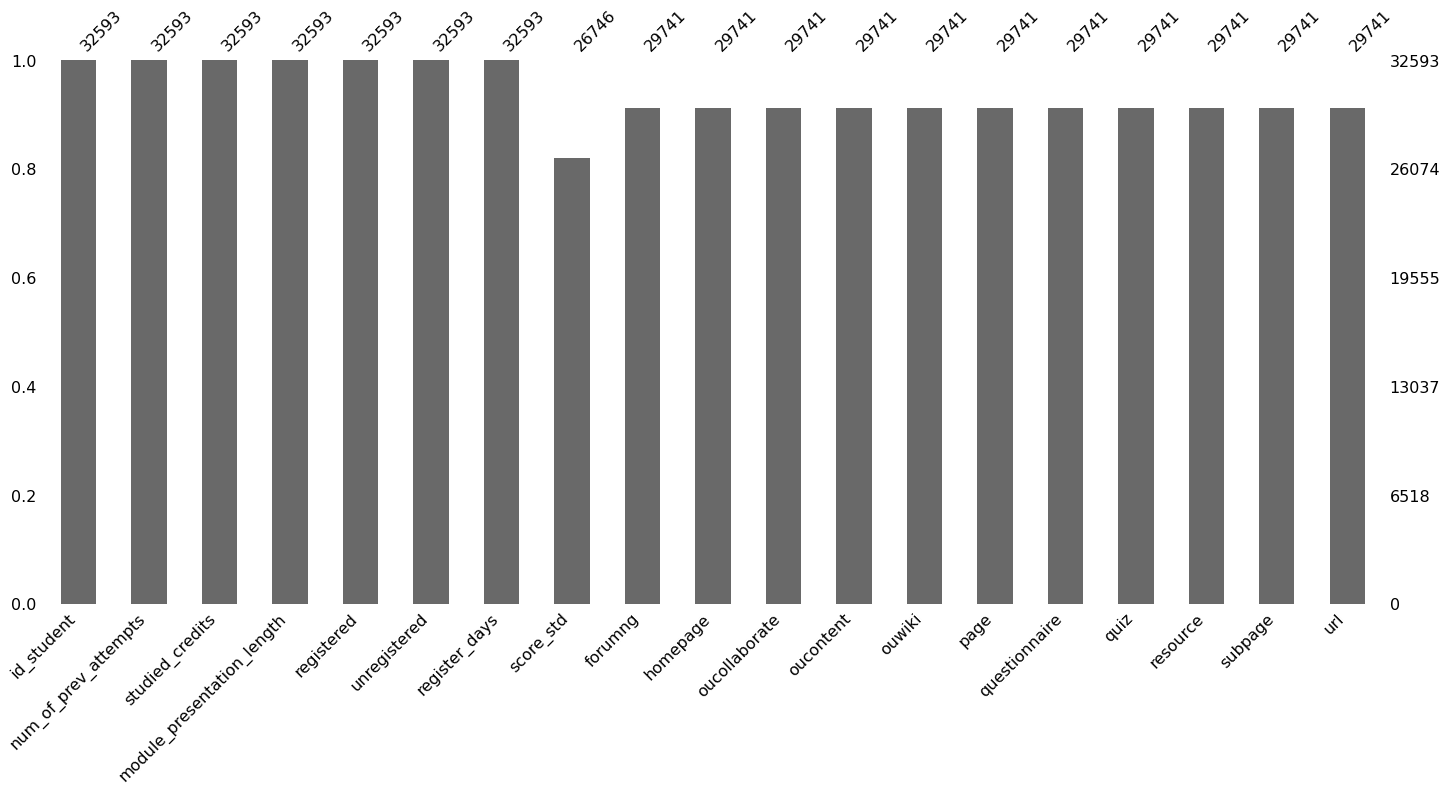

In [38]:
msno.bar(dataset)
dataset = dataset.fillna(0)

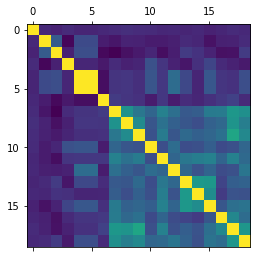

In [39]:
plt.matshow(dataset.corr());

In [40]:
joined=pd.merge(studentAssessment_df,assessments_df,on='id_assessment',how='left')
joined['score*weight'] = joined['score'].astype(int)*joined['weight'].astype(int)
# Sum up score*weights and divide by total weights (There are some students has total weight higher or much lower than %100)
# for all students of all modules to calculate final mark.
marks=joined.groupby(['id_student','code_module','code_presentation'],as_index=False)['score*weight','weight'].sum()

marks['adjusted_mark'] = marks['score*weight']/marks['weight']
marks["mark"]  = marks['score*weight']/200
marks.rename(columns = {'score*weight': 'total_score*weight', 'weight': 'attempted_weight'}, inplace=True)
marks = marks.round(1)
joined=pd.merge(marks,studentInfo_df,on=['id_student','code_module','code_presentation'],how='left')
# There can be students who attempt some of the assignments but then withdraw the course,
# mark variable may have a value for these students.
# These marks shouldn't be used in analysis so will be replaced with NaN as follows.
joined.loc[joined.final_result=='Withdrawn','mark']= np.nan
joined.loc[joined.final_result=='Withdrawn','adjusted_mark']= np.nan


c:\hello\ai\ai_evr\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


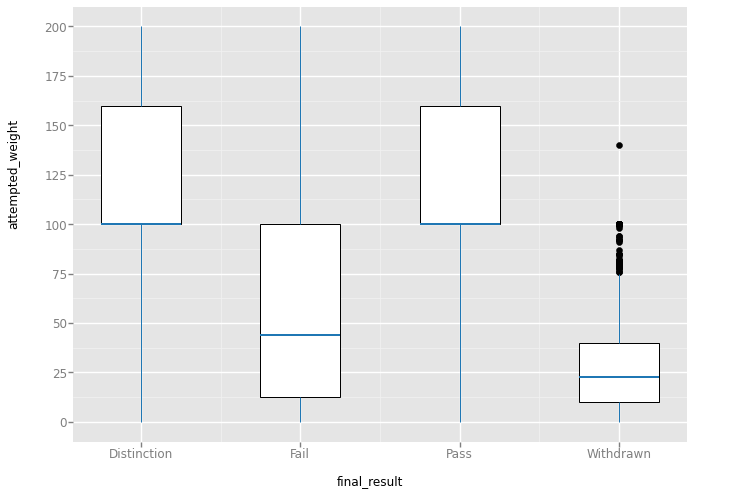

<ggplot: (-9223371924081442120)>

In [41]:
ggplot(joined,aes(x="final_result", y="attempted_weight")) + geom_boxplot(aes(x="final_result", y="attempted_weight"))


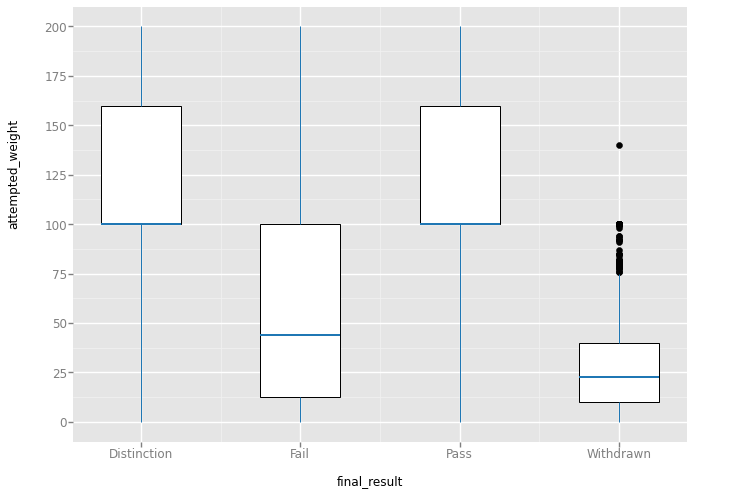

<ggplot: (-9223371924081442248)>

In [42]:
g=ggplot( joined  ,aes("final_result", "attempted_weight"))
g + geom_boxplot()


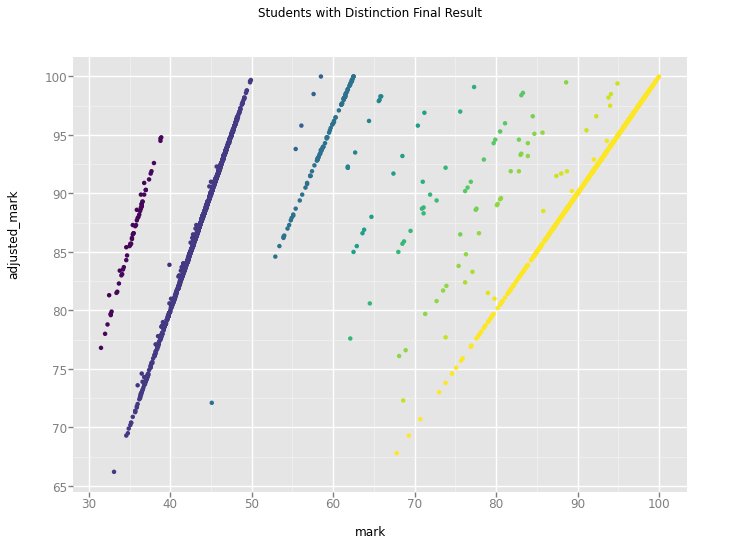

<ggplot: (-9223371924081417644)>

In [43]:
ggplot(joined[joined.final_result=="Distinction"],(aes(x="mark", y="adjusted_mark"))) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Distinction Final Result")


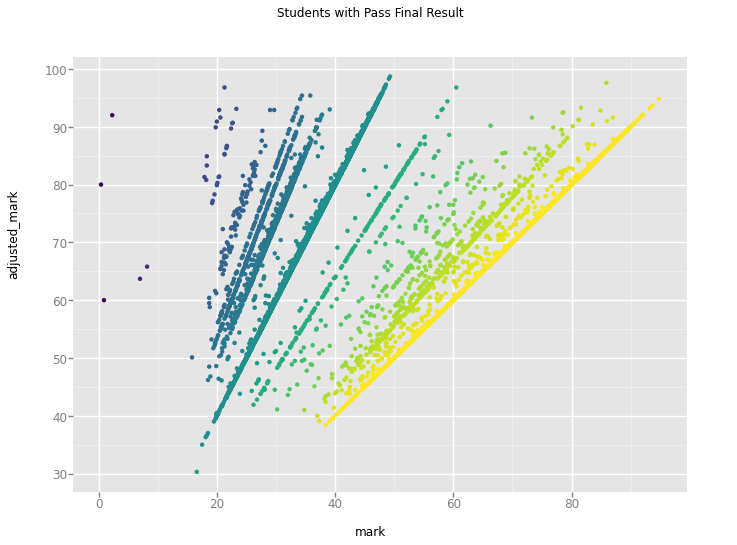

<ggplot: (-9223371924081440432)>

In [44]:
ggplot(joined[joined.final_result=="Pass"],aes(x="mark", y="adjusted_mark")) + geom_point(aes(x="mark", y="adjusted_mark", color="attempted_weight"))\
+ggtitle("Students with Pass Final Result")

In [45]:
studentVle_df = pd.read_csv('OULAD/studentVle.csv')
# show_basic_info(studentVle_df)

vle_df = pd.read_csv('OULAD/vle.csv')
# show_basic_info(vle_df)

In [46]:
# Clicks for each id_site for all enrolments of all students
clicks = pd.merge(studentVle_df, vle_df, on=["id_site"])
filtered_columns =["code_module_x","code_presentation_x","id_student","id_site","date","sum_click","activity_type"]
clicks = clicks.reindex(columns = filtered_columns)
clicks.rename(columns = {'code_module_x': 'code_module', 'code_presentation_x': 'code_presentation'}, inplace=True)

In [47]:
studentVle_df.head(3)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1


In [48]:
vle_df.head(3)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?


In [49]:
clicks.head(3)

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng


In [50]:
df = joined

In [64]:
# Number of students for each module and presentation
number_of_students = df.groupby(["code_module","code_presentation"])\
    .agg(stu_count =("id_student", lambda x: x.nunique())).reset_index()

# Total number of clicks
grouped_clicks = clicks.groupby(["code_module","code_presentation","activity_type"])\
.agg(total_click = ("sum_click",sum)).reset_index()

# Clicks per person
grouped_clicks=pd.merge(grouped_clicks, number_of_students, on=["code_module","code_presentation"], how="left")
grouped_clicks["click_per_person"] = (grouped_clicks["total_click"]/grouped_clicks["stu_count"]).round(1)
grouped_clicks["click_per_person"] = grouped_clicks["click_per_person"].astype(int)


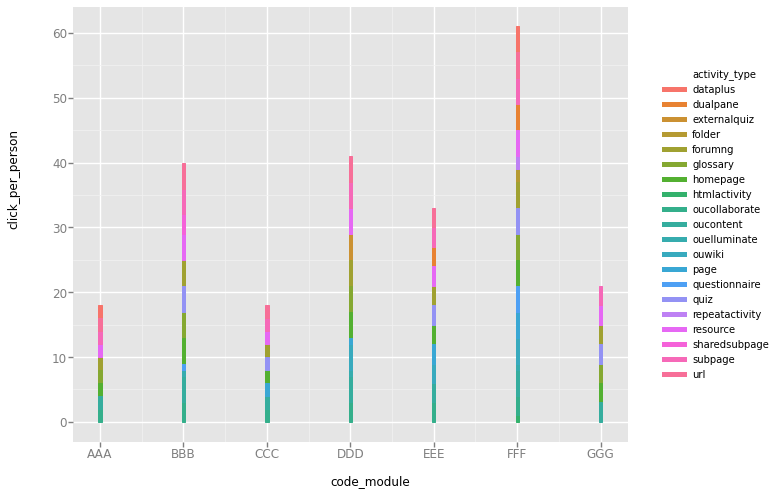

<ggplot: (-9223371924041102944)>

In [127]:
# Draw a stacked bar chart
# Cannot be done: pd.crosstab(grouped_clicks.code_module,[grouped_clicks.click_per_person, grouped_clicks.activity_type]).plot.bar(stacked = True);
# ggplot(grouped_clicks, aes(fill="activity_type", y="click_per_person", x="code_module")) + \
#     geom_bar(position="stack", stat="identity")

In [69]:
grouped_clicks

,code_module,code_presentation,activity_type,total_click,stu_count,click_per_person
0,AAA,2013J,dataplus,1843,365,5
1,AAA,2013J,forumng,175513,365,480
2,AAA,2013J,glossary,327,365,0
3,AAA,2013J,homepage,140345,365,384
4,AAA,2013J,oucollaborate,241,365,0
5,AAA,2013J,oucontent,267482,365,732
6,AAA,2013J,resource,7365,365,20
7,AAA,2013J,subpage,39624,365,108
8,AAA,2013J,url,15754,365,43
9,AAA,2014J,dataplus,1555,340,4


In [105]:
pivot_df = grouped_clicks.pivot_table(index='code_module', columns='activity_type', values='click_per_person', aggfunc=np.sum)
pivot_df1 = pivot_df.replace( np.NaN,0)

In [106]:
pivot_df1

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
code_module,,,,,,,,,,,,,,,,,,,,
AAA,9.0,0.0,0.0,0.0,955.0,1.0,755.0,0.0,0.0,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,202.0,80.0
BBB,0.0,0.0,0.0,0.0,1445.0,4.0,747.0,0.0,6.0,522.0,1.0,0.0,0.0,3.0,298.0,0.0,137.0,0.0,181.0,56.0
CCC,0.0,0.0,0.0,0.0,373.0,0.0,442.0,0.0,4.0,300.0,0.0,0.0,2.0,0.0,1259.0,0.0,126.0,0.0,203.0,15.0
DDD,0.0,0.0,51.0,0.0,1183.0,49.0,1159.0,0.0,39.0,554.0,12.0,233.0,1.0,0.0,0.0,0.0,244.0,0.0,801.0,135.0
EEE,0.0,5.0,0.0,0.0,990.0,0.0,841.0,0.0,7.0,1970.0,0.0,591.0,0.0,0.0,420.0,0.0,69.0,0.0,109.0,123.0
FFF,26.0,8.0,0.0,2.0,1478.0,1.0,1527.0,5.0,14.0,4167.0,17.0,100.0,35.0,36.0,2424.0,0.0,148.0,0.0,1019.0,106.0
GGG,0.0,0.0,0.0,0.0,335.0,9.0,401.0,0.0,0.0,682.0,0.0,0.0,0.0,0.0,283.0,0.0,104.0,0.0,75.0,0.0


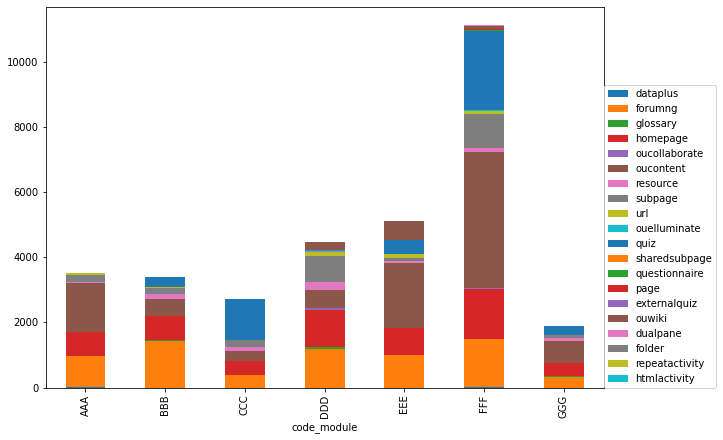

In [126]:
ax = pivot_df1.loc[:,grouped_clicks.activity_type.unique().tolist()].plot.bar(stacked=True, figsize=(10,7))

ax.legend( loc=(1,0), fontsize=10)

In [85]:
dict(zip(grouped_clicks.code_module, grouped_clicks.click_per_person)) 

{'AAA': 37, 'BBB': 1, 'CCC': 8, 'DDD': 21, 'EEE': 34, 'FFF': 26, 'GGG': 29}

In [85]:
grouped_clicks.activity_type.unique()

array(['dataplus', 'forumng', 'glossary', 'homepage', 'oucollaborate',
       'oucontent', 'resource', 'subpage', 'url', 'ouelluminate', 'quiz',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'folder', 'repeatactivity', 'htmlactivity'],
      dtype=object)

# https://www.kaggle.com/anlgrbz/data-cleaning-feature-generation-eda-segmentation
# https://www.kaggle.com/chounta/the-gradebook